Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
Summer | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. 8.1** | **Hands-on Activity 8.1 : Saving Models**
**Name** | **Espiritu, Diego Angelo G.**
**Section** | CPE31S3
**Date Performed**: | **July 3, 2024**
**Date Submitted**: | **July 8, 2024**
**Instructor**: | **Engr. Roman M. Richard**

<hr>

**Instructions:**

  1. Choose any dataset applicable to either a classification problem or a regression problem. </br>
  2. Explain your datasets and the problem being addressed. </br>
  3. Show evidence that you can do the following:
1. Save a model in HDF5 format
2. Save a model and load the model in a JSON format
3. Save a model and load the model in a YAML format
4. Checkpoint Neural Network Model Improvements
5. Checkpoint Best Neural Network Model only
6. Load a saved Neural Network model
7. Visualize Model Training History in Keras
8. Show the application of Dropout Regularization
9. Show the application of Dropout on the visible layer
10. Show the application of Dropout on the hidden layer
11. Show the application of a time-based learning rate schedule
12. Show the application of a drop-based learning rate schedule.

4. Submit the link to your Google Colab (make sure that it is accessible to me)

dataset link: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

**The dataset:**
- I decided on a categorical dataset regarding calculating the student's academic achievement, using the supplied characteristics such as academic grades, geography, and family income. The purpose of the dataset is to identify whether the student will graduate, drop out, or stay enrolled.

**The problem:**
- A small number of college students finish, and the reasons for this are immeasurable, including financial, location, family, and influence. The primary goal of this dataset is to examine the relationship between various factors and academic progress of the student. If there are any connections, we can assist individual students who meet the failing requirements so that they can graduate, hence enhancing the graduation percentage.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Mounting Googledrive containing the dataset, and will be the destination for the model saving

In [ ]:
!pip install keras
!pip install scikeras
!pip install np_utils
!pip install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np

- Installing liblaries that will be used ont eh activity

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dropout
from keras.callbacks import History
from keras.callbacks import LearningRateScheduler

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Dropout

- Loading all of the libraries and functions that will be utilized throughout the activity

In [ ]:
seed = 64
np.random.seed(seed)

- Declaring a seed in numpy gives the random number generator an initial value, allowing the numbers created to be reproduced.

In [ ]:
acadS = pd.read_csv("/content/drive/MyDrive/HOA8.1SM/data.csv", delimiter = ';')

- Assigning the dataset to the "acadS" variable in pandas, and using the delimiter to separate the values in the dataset.

In [ ]:
# Extract columns 1 through 36 into X
X = acadS.iloc[:, :-1].values

# Extract the last column into Y
Y = acadS.iloc[:, -1].values

# Defining the mapping
category_mapping = {"Graduate": 0, "Enrolled": 1, "Dropout": 2}

# Map the values in the 'Y' column using the mapping dictionary
Y = acadS.iloc[:, -1].map(category_mapping).values

# One-hot encode the target variable Y
Y_encoded = to_categorical(Y)

- Extracting and sepereating the dataset, both feature columns and target column are assigned on variables X and Y.
- The target column Y contains a string values ("Graduate", "Dropped", "Enrolled"). Converting it first to interget value so that it can be used for training. Y_encoded now contains the string values that will be used for the activity

In [ ]:
# create model
model = Sequential()
model.add(Dense(36, input_dim=36, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- The model that I would use for the remainder of this exercise is the one above, setup with three hidden layers in a 36, 16, 8 arrangement, and three output layers representing each category. The output layer's activation function is Softmax, using categorical_crossentropy as the loss.

In [ ]:
model.fit(X, Y_encoded, epochs=20, batch_size=10, verbose=1)

# evaluate the model
scores = model.evaluate(X, Y_encoded, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3495 - loss: 188.6027
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5071 - loss: 1.0605
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5031 - loss: 1.0272
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5106 - loss: 1.0158
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4958 - loss: 1.0235
Epoch 6/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5077 - loss: 1.0125
Epoch 7/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5067 - loss: 1.0143
Epoch 8/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4944 - loss: 1.0242
Epoch 9/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5084 - loss: 1.0113
Epoch 10/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5193 - loss: 1.0035
Epoch 11/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5057 - loss: 1.0116
Epoch 12/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

- For the first fitting I have used an epoch of 20 and have resulted with an accuracy of 49.98%

# **Save a model in HDF5 format and load the model in a JSON format**

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/HOA8.1SM/model.json", "w") as json_file:
    json_file.write(model_json)
# Serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/HOA8.1SM/model.weights.h5")
print("Saved model weights to disk")

Saved model weights to disk


- In order to save the model in hdf5 format and load it into json format, I first used the code supplied in the module to serialize the model. The first directory will write the.json file on that directory using the.write function to serialize the weights. The weights will then be stored on the second directory using the format.h5.

In [ ]:
# load json & create model
json_file = open('/content/drive/MyDrive/HOA8.1SM/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/HOA8.1SM/model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


- The open() method is used to load the json file, and the path to the.json file is specified. The.read() function is then used to read the json file's contents and put them in the loaded_model_json variable. The load_weights() method then closes the json file and loads it with the h5 file.

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y_encoded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

compile_metrics: 49.98%


- The model is then assessed using the X and Y_encoded parameters, categorical_crossentropy as the loss set, and Accuracy as the metric.
- It is reasonable to conclude that the model we just constructed has an accuracy of 49.98%.

# Save a model and load the model in a YAML format

In [ ]:
# serialize model to YAML
model_yaml = model.to_json()
with open("/content/drive/MyDrive/HOA8.1SM/model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/HOA8.1SM/model_yaml.weights.h5")
print("Saved model to disk")


Saved model to disk


- The procedure is repeated, but instead of storing the model in.json format,.yaml is utilized. The first Directory serves as the location for the.yaml file. The weights are then stored in ah.h5 format.

In [ ]:
# load YAML and create model
yaml_file = open('/content/drive/MyDrive/HOA8.1SM/model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/HOA8.1SM/model_yaml.weights.h5")
print("Loaded model from disk")

Loaded model from disk


- The.yaml file is then loaded again into the loaded_model_yaml variable using the (read) method before being closed. The loaded_model variable is subsequently allocated the file loaded_from.json. The weights are then recorded in.h5 format.

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y_encoded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

compile_metrics: 49.98%


- After building the model, the score is the same, which is 49.98% of what we built in the previous case.

# Checkpoint Neural Network Model Improvements

In [ ]:
# create model
model = Sequential()
model.add(Dense(36, input_dim=36, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- This component uses the same model, which consists of three hidden layers in a 36,16,8 arrangement, as well as the same compilation setup.

In [ ]:
# checkpoint
filepath="/content/drive/MyDrive/HOA8.1SM/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Fit the model
model.fit(X, Y_encoded, validation_split=0.33, epochs=20, batch_size=10, callbacks=callbacks_list, verbose=1)
# evaluate loaded model on test data
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4073 - loss: 266.6028
Epoch 1: val_accuracy improved from -inf to 0.48493, saving model to /content/drive/MyDrive/HOA8.1SM/weights-improvement-01-0.48.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4072 - loss: 265.9874 - val_accuracy: 0.4849 - val_loss: 1.0925
Epoch 2/20
292/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5050 - loss: 1.0727
Epoch 2: val_accuracy improved from 0.48493 to 0.48767, saving model to /content/drive/MyDrive/HOA8.1SM/weights-improvement-02-0.49.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5050 - loss: 1.0727 - val_accuracy: 0.4877 - val_loss: 1.0500
Epoch 3/20
285/297 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5055 - loss: 1.0443
Epoch 3: val_accuracy improved from 0.48767 to 0.48973, saving model to /content/drive/MyDrive/HOA8.1SM/weights-improvement-03-0.49.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5057 - loss: 1.0441 - val_accuracy: 0.

- The model is developed on this section of the code, but after each best epoch, the model is saved to the predefined directory. Every time a high accuracy is detected, it is recorded in the directory. The difficulty is that numerous models are saved in the directory, making it difficult to choose the best one.

# Checkpoint Best Neural Network Model only

In [ ]:
# checkpoint
filepath="/content/drive/MyDrive/HOA8.1SM/weights.best.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

- The checkpoint code is repeated with the file path. The method ModelCheckpoint() is then called and saved on the checkpoint variable, which is utilized for fitting the model in the following cell.

In [ ]:
# Fit the model
model.fit(X, Y_encoded, validation_split=0.33, epochs=50, batch_size=10, callbacks=callbacks_list, verbose=1)

Epoch 1/50
289/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5166 - loss: 1.0112
Epoch 1: val_accuracy improved from -inf to 0.48630, saving model to /content/drive/MyDrive/HOA8.1SM/weights.best.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5165 - loss: 1.0111 - val_accuracy: 0.4863 - val_loss: 1.0273
Epoch 2/50
290/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5060 - loss: 1.0089
Epoch 2: val_accuracy improved from 0.48630 to 0.48973, saving model to /content/drive/MyDrive/HOA8.1SM/weights.best.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5063 - loss: 1.0089 - val_accuracy: 0.4897 - val_loss: 1.0254
Epoch 3/50
291/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.0136
Epoch 3: val_accuracy did not improve from 0.48973
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5091 - loss: 1.0135 - val_accuracy: 0.4897 - val_loss: 1.0219
Epoch 4/50
284/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 0.9971
Epoch 4: va

# Load a saved Neural Network model

In [ ]:
# load weights
model.load_weights("/content/drive/MyDrive/HOA8.1SM/weights.best.keras")
# Compile model (required to make predictions)
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

Created model and loaded weights from file


In [ ]:
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y_encoded, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5285 - loss: 1.0002
compile_metrics: 50.66%


# Visualize Model Training History in Keras

In [ ]:
# Fit the model
history = model.fit(X, Y_encoded, validation_split=0.33, epochs=50, batch_size=10, callbacks=callbacks_list, verbose=1)

Epoch 1/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5069 - loss: 1.0159
Epoch 1: val_accuracy did not improve from 0.49247
297/297 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5069 - loss: 1.0159 - val_accuracy: 0.4890 - val_loss: 1.0231
Epoch 2/50
271/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5209 - loss: 1.0038
Epoch 2: val_accuracy did not improve from 0.49247
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5202 - loss: 1.0044 - val_accuracy: 0.4870 - val_loss: 1.0247
Epoch 3/50
282/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5197 - loss: 1.0080
Epoch 3: val_accuracy did not improve from 0.49247
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5195 - loss: 1.0080 - val_accuracy: 0.4863 - val_loss: 1.0344
Epoch 4/50
292/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5165 - loss: 1.0119
Epoch 4: val_accuracy did not improve from 0.49247
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5165 - loss: 1.0118 - val_accuracy: 0.4877 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


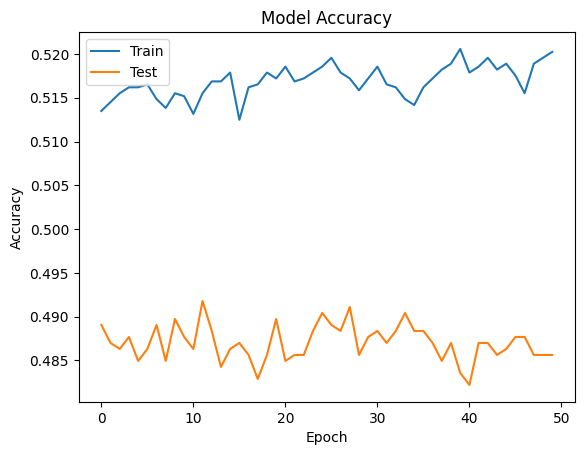

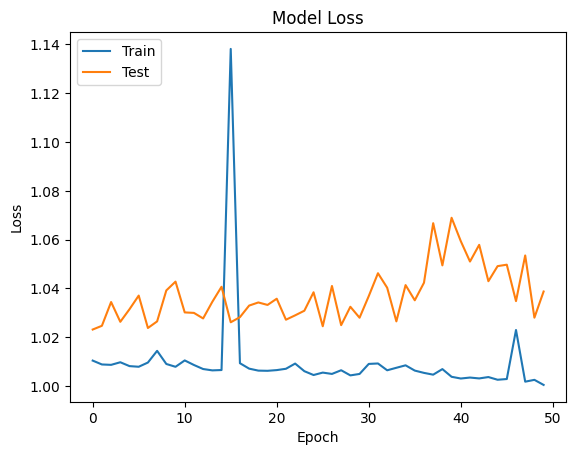

compile_metrics: 49.98%


In [ ]:
# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

- The training timeline is depicted in the plot above. The horizontal represents the epoch, while the vertical represents loss and accuracy. The graph provided is not very impressive because the line fluctuates and barely increases insignificantly.

# Show the application of Dropout Regularization

In [ ]:
# Create model
model = Sequential()
model.add(Dense(36, input_dim=36, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2 (20% of the input units will be randomly dropped during training)
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Create an instance of History callback to capture training history
history = History()

# Fit the model with dropout regularization and capture training history
model.fit(X, Y_encoded, validation_split=0.33, epochs=20, batch_size=10, callbacks=[history], verbose=1)

# evaluate the model
scores = model.evaluate(X, Y_encoded, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.3389 - loss: 186.7356 - val_accuracy: 0.4829 - val_loss: 3.8525
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4248 - loss: 16.4177 - val_accuracy: 0.3411 - val_loss: 1.0729
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4117 - loss: 3.8979 - val_accuracy: 0.4856 - val_loss: 1.1275
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4087 - loss: 2.7993 - val_accuracy: 0.4863 - val_loss: 1.0694
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4164 - loss: 1.8655 - val_accuracy: 0.1918 - val_loss: 1.1644
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4219 - loss: 1.4627 - val_accuracy: 0.4863 - val_loss: 1.0285
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4208 - loss: 1.4585 - val_accuracy: 0.4863 - val_loss: 1.0267
Epoch 8/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4201 - loss: 1.2767 - val_accuracy

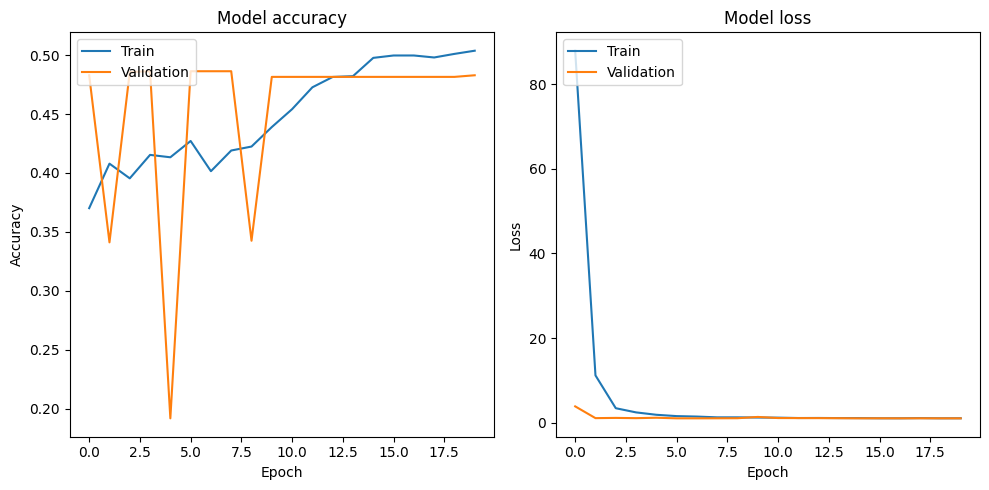

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


- The model's training accuracy is good, and its loss decreases with each epoch.

# Show the application of Dropout on the visible layer

In [ ]:
# Define input layer with dropout
visible = Input(shape=(36,))
dropout_visible = Dropout(0.2)(visible)  # Apply dropout directly to the input layer

# Define the model
hidden1 = Dense(36, activation='relu')(dropout_visible)
hidden2 = Dense(16, activation='relu')(hidden1)
hidden3 = Dense(8, activation='relu')(hidden2)
output = Dense(3, activation='softmax')(hidden3)

In [ ]:
# Create model
model = Model(inputs=visible, outputs=output)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- The model is then compiled.

In [ ]:
# Create instance of History callback
history = History()

# Fit the model with dropout regularization and capture training history
model.fit(X, Y_encoded, validation_split=0.33, epochs=20, batch_size=10, callbacks=[history], verbose=1)

# evaluate the model
scores = model.evaluate(X, Y_encoded, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3633 - loss: 183.0293 - val_accuracy: 0.4815 - val_loss: 1.0812
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5119 - loss: 1.0955 - val_accuracy: 0.4870 - val_loss: 1.0540
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5089 - loss: 1.0622 - val_accuracy: 0.4808 - val_loss: 1.0333
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4990 - loss: 1.0299 - val_accuracy: 0.4829 - val_loss: 1.0286
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5217 - loss: 1.0130 - val_accuracy: 0.4815 - val_loss: 1.0265
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5048 - loss: 1.0163 - val_accuracy: 0.4815 - val_loss: 1.0266
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4947 - loss: 1.0266 - val_accuracy: 0.4815 - val_loss: 1.0272
Epoch 8/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5145 - loss: 1.0138 - val_accuracy: 

- Uppon performing the dropout on the visible layer it is still insignificant, and have a lower accuracy compared to applying it in the hidden layers. An accuracy score of 49.93% is shown.

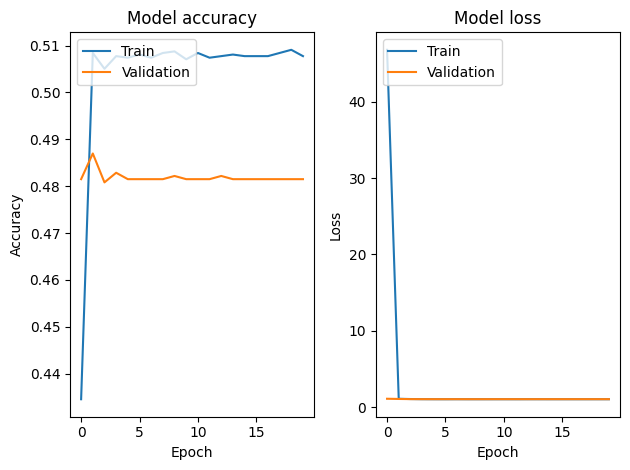

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Show the application of Dropout on the hidden layer

In [ ]:
# Define Keras model with dropout applied to a hidden layer
model = Sequential([
    Dense(36, input_dim=36, activation='relu'),
    Dropout(0.2),  # Apply dropout with a rate of 0.2 to the first hidden layer
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Create model
model = Model(inputs=visible, outputs=output)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Create instance of History callback to capture training history
history = History()

# Fit the model with dropout regularization and capture training history
model.fit(X, Y_encoded, validation_split=0.33, epochs=20, batch_size=10, callbacks=[history], verbose=1)

# evaluate the model
scores = model.evaluate(X, Y_encoded, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5003 - loss: 1.0252 - val_accuracy: 0.4815 - val_loss: 1.0269
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5148 - loss: 1.0090 - val_accuracy: 0.4815 - val_loss: 1.0271
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5111 - loss: 1.0167 - val_accuracy: 0.4815 - val_loss: 1.0269
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5035 - loss: 1.0184 - val_accuracy: 0.4815 - val_loss: 1.0270
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4956 - loss: 1.0285 - val_accuracy: 0.4815 - val_loss: 1.0271
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5227 - loss: 1.0055 - val_accuracy: 0.4815 - val_loss: 1.0267
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5122 - loss: 1.0106 - val_accuracy: 0.4815 - val_loss: 1.0270
Epoch 8/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5043 - loss: 1.0186 - val_accuracy: 0.

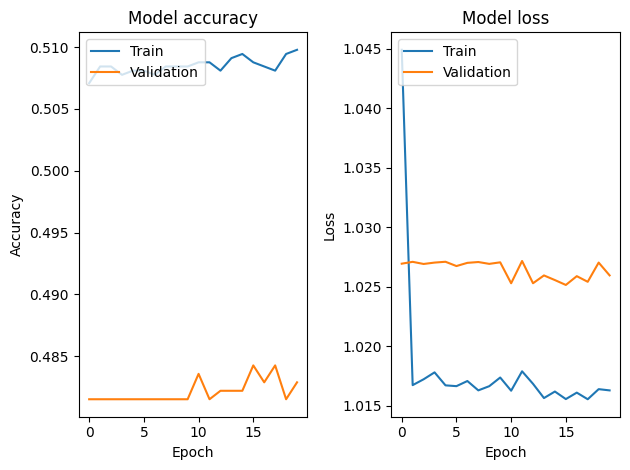

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

- The chart is likewise incorrect because the training accuracy remains within the same range. However, the training graph indicates decent results since it plummeted in the first few epochs and thereafter fluctuated at the same level.

# Show the application of a time-based learning rate schedule

In [ ]:
# Defining the model
model = Sequential([
    Dense(36, input_dim=36, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Define the initial learning rate
initial_learning_rate = 0.001

- The standard model is generated above, and the initial_learning_rate variable is set to 0.001.

In [ ]:
# Define the function to decay the learning rate over time
def lr_schedule(epoch):
    return initial_learning_rate * np.exp(-0.1 * epoch)

# Create an instance of LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

- The lr_schedule function is then utilized in the function, with the epoch argument being supplied through. We then decay the schedule so that the learning rate drops exponentially across the number of epochs.
- The function is subsequently assigned to another library function called LearningRateScheduler, using the parameter lr_scheduler.

In [ ]:
# Compile the model with Adam optimizer and an initial learning rate
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the learning rate scheduler callback
history = model.fit(X, Y_encoded, validation_split=0.33, epochs=20, batch_size=10, callbacks=[lr_scheduler], verbose=1)

# evaluate the model
scores = model.evaluate(X, Y_encoded, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3573 - loss: 114.0284 - val_accuracy: 0.3274 - val_loss: 1.1902 - learning_rate: 0.0010
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4327 - loss: 1.6257 - val_accuracy: 0.4801 - val_loss: 1.5223 - learning_rate: 9.0484e-04
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4851 - loss: 1.6123 - val_accuracy: 0.4733 - val_loss: 1.6806 - learning_rate: 8.1873e-04
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4465 - loss: 1.7971 - val_accuracy: 0.6610 - val_loss: 1.0568 - learning_rate: 7.4082e-04
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5203 - loss: 1.3121 - val_accuracy: 0.3473 - val_loss: 1.1416 - learning_rate: 6.7032e-04
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5064 - loss: 1.6364 - val_accuracy: 0.3534 - val_loss: 2.1495 - learning_rate: 6.0653e-04
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.

- After fitting the model, I had the highest accuracy score on this task, with 70.86%.

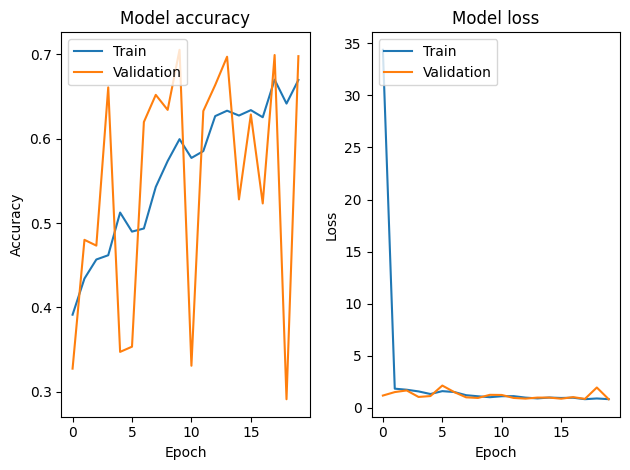

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

- The figure demonstrates considerable improvements, including an increase in training accuracy and a decrease in training model loss.

# Show the application of a drop-based learning rate schedule

In [ ]:
# Define the model
model = Sequential([
    Dense(36, input_dim=36, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Define the initial learning rate
initial_learning_rate = 0.001

# Define the drop factor and number of epochs after which to apply the drop
drop_factor = 0.5
epochs_drop = 10

- In this area of the code, an epoch drop_factor and epoch_drop value are assigned, namely 0.5 and 10.

In [ ]:
# Define the function to adjust the learning rate over time
def lr_schedule(epoch):
    return initial_learning_rate * (drop_factor ** np.floor((1 + epoch) / epochs_drop))

# Create an instance of LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

- The lr_schedule function is then defined, which takes the epoch number as input and returns the learning rate for that particular epoch.
- The instance of learningRateScheduler passes the function lr_schedule as an input.

In [ ]:
# Compile the model with Adam optimizer and an initial learning rate
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the learning rate scheduler callback
history = model.fit(X, Y_encoded, validation_split=0.33, epochs=20, batch_size=10, callbacks=[lr_scheduler], verbose=1)

# evaluate the model
scores = model.evaluate(X, Y_encoded, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4290 - loss: 416.7606 - val_accuracy: 0.4842 - val_loss: 1.0271 - learning_rate: 0.0010
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5128 - loss: 1.0216 - val_accuracy: 0.4829 - val_loss: 1.0259 - learning_rate: 0.0010
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5089 - loss: 1.0206 - val_accuracy: 0.4842 - val_loss: 1.0332 - learning_rate: 0.0010
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5117 - loss: 1.0156 - val_accuracy: 0.4829 - val_loss: 1.0406 - learning_rate: 0.0010
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5037 - loss: 1.0332 - val_accuracy: 0.4829 - val_loss: 1.0235 - learning_rate: 0.0010
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5049 - loss: 1.0171 - val_accuracy: 0.4822 - val_loss: 1.0267 - learning_rate: 0.0010
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5091 - loss: 1.0112 

- The results demonstrate a reduction in performance, with an accuracy rate of 50.29%, which is 20% lower than the prior training.

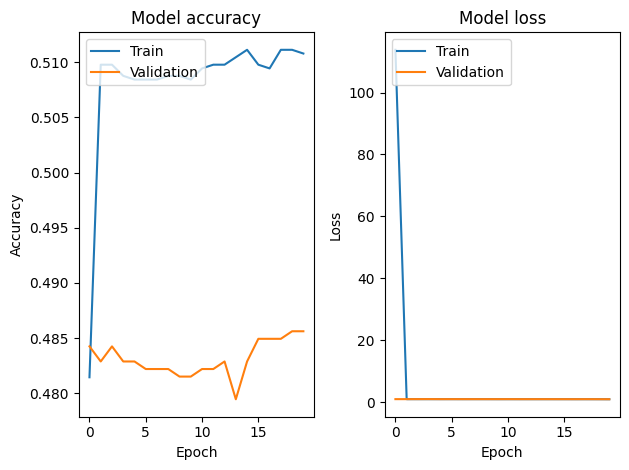

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

- The accuracy of the Drop-based Schedule demonstrates that the training accuracy improves on the first epoch and remains in the.50 range until the last epoch, when it fluctuates.
- The training model loss decreased dramatically and stayed at zero.

**Conclusions and Lessons Learned**


- During this hands-on activity, I observed that it includes four parts: first, preserving the model, second, implementing checkpoints on the models, third, implementing dropout in neural networks, and last, implementing a time-based learning rate schedule. I found these neural network tools and strategies valuable in increasing the model's performance.
The use of time-based learning rate schedule has the highest accuracy and best performance of any model I've tried, with a rate of 70.86%.

